<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/CHAPTER3%20%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **들어가며**

모델 예측 성능을 평가하는 성능 평가 지표는 분류와 회귀에 따라 여러 종류가 있습니다. 이번 챕터에서는 분류 위주의 성능 평가 지표를 살펴보고 5장에서 회귀를 위한 성능 평가 지표를 살펴보겠습니다.

분류의 평가 방법은 일반적으로 실제 결과 데이터와 예측 결과 데이터가 얼마나 정확하고 오류가 적게 발생하는가에 기반합니다. 다만 이렇게 정확도만을 기반으로 판단하면 잘못된 평가 결과를 얻을 수 있습니다. 특히 0이나 1로 결정값이 한정되는 이진 분류의 성능 평가 지표는 정확도가 아닌 다른 성능 평가 지표가 더 유효한 경우가 많습니다. 

# **1. 정확도(Accuracy)**

**정확도**는 실제 데이터에서 예측 데이터가 얼마나 같은지 판단하는 지표입니다. 정확도를 구하는 공식은 아래와 같습니다.

$$ 정확도(Accuracy) = \frac{예측 결과가 동일한 데이터 건수}{전체 예측 데이터 건수}$$

이진 분류의 경우 데이터 구성에 따라 모델 성능을 왜곡할 수 있기 때문에 정확도만을 기반으로 성능을 평가하지 않습니다. 정확도 지표가 모델 성능을 어떻게 왜곡하는지 살펴보겠습니다.

전 챕터에서 타이타닉 데이터셋으로 예측했을 때 예측 정확도는 80%대였습니다. 그러나 남자보다 여자가 생존 확률이 높았기 때문에 별다른 알고리즘을 적용하지 않아도 비슷한 수치가 나올 수 있습니다. 여자는 무조건 생존으로 예측하고 남자는 무조건 사망으로 예측해도 높은 정확도를 나타낼 것입니다.

`BaseEstimator` 클래스를 상속받아 아무 학습을 수행하지 않고 성별에 따라 생존자를 예측하는 단순한 분류기를 생성하겠습니다. `BaseEstimator` 클래스를 상속받으면 Customized 형태의 Estimator를 만들 수 있습니다. 생성할 `MyDummyClassifier` 클래스는 `fit()` 메서드는 아무것도 수행하지 않으며 `predict()` 메서드는 'Sex' 피처가 1이면 0, 그렇지 않으면 1로 예측하는 단순한 분류기입니다.

In [1]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
        return pred

전 챕터에서 생성한 함수를 다시 선언하겠습니다.

In [2]:
from sklearn.preprocessing import LabelEncoder

# 결측치를 처리하는 함수를 선언합니다.
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 데이터 분석에 불필요한 피처를 제거하는 함수를 선언합니다.
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩을 수행하는 함수를 선언합니다.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Sex', 'Cabin', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 전처리를 위해 생성한 모든 함수를 호출하는 함수를 선언합니다.
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

`MyDummyClassifier` 분류기로 생존자를 예측하겠습니다.

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('/content/gdrive/MyDrive/titanic/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(
    X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Clssifier의 정확도는: {:.4f}'.format(accuracy_score(y_test, mypredictions)))

Mounted at /content/gdrive/
Dummy Clssifier의 정확도는: 0.7877


데이터 구성이 편중되어 있으므로 단순한 알고리즘을 적용해도 높은 정확도가 도출됩니다. 데이터 100개 중에 레이블 0인 데이터가 90개, 레이블 1인 데이터가 10개라면 무조건 0으로 예측하게 했을 때 정확도는 90%가 됩니다.

MNIST 데이터 세트를 변환하여 불균형한 데이터 세트로 만들고, 정확도 지표를 적용했을 때 발생하는 문제를 확인해보겠습니다. 0 ~ 9 숫자 이미지의 픽셀 정보를 가지고 있고, 이를 기반으로 숫자 Digit를 예측하는 데 사용됩니다. 원래 이 데이터 세트는 레이블 값이 0 ~ 9까지 있는 멀티 레이블 분류를 위한 것이지만 이진 분류 문제로 바꿔 보겠습니다. 레이블 7이면 True이고 나머지는 False로 바꾸겠습니다. 10%만 True입니다.

불균형한 데이터 세트와 Dummy Classifier를 생성하겠습니다.

In [4]:
from sklearn.datasets import load_digits

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass

    # X 데이터 세트의 크기만큼 모두 0값으로 만듭니다.
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
digits = load_digits()

# 7이면 `True`이고 `astype(int)`로 1로 변환하고,
# 7이 아니면 `False`이고 0으로 변환합니다.
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=11)

생성한 분류기로 정확도를 측정해보겠습니다.

In [5]:
print('레이블 테스트 세트 크기:', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 해도 정확도는 {:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 해도 정확도는 0.900


이처럼 불균형한 레이블로 구성된 데이터 세트의 경우 성능 측정을 위해 정확도 평가 지표를 사용하는 것은 적절하지 않습니다.

# **2. 오차 행렬**

이진 분류에서 성능 지표로 활용되는 **오차행렬(confusion matrix, 혼동행렬)**은 예측 오류의 정도와 예측 오류 유형을 나타내는 지표입니다. 

오차 행렬은 4분면 행렬에서 실제 레이블 클래스 값과 예측 레이블 클래스 값이 어떠한 유형을 가지고 매핑되는지를 나타냅니다. 4분면의 왼쪽, 오른쪽을 예측된 클래스 값 기준으로 Negetive와 Positive로 분류하고, 4분면의 위, 아래를 실제 클래스 값 기준으로 Negative와 Positive로 분류하면 예측 클래스와 실제 클래스의 값 유형에 따라 결정되는 TN, FP, FN, TP 형태로 오차 행렬의 4분면을 채울 수 있습니다.

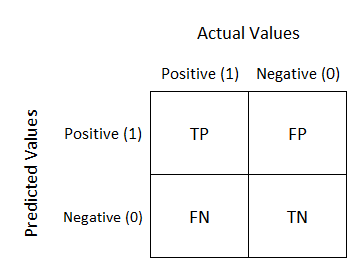

- TN(True Negative): 예측값을 Negative 값 0으로 예측했고 실제 값 역시 Negative 값 0입니다.

- FP(False Positive): 예측값을 Positive 값 1로 예측했지만 실제 값은 Negative 값 0입니다.

- FN(False Negative): 예측값을 Negative 값 0으로 예측했지만 실제 값은 Positive 값 1입니다.

- TP(True Positive): 예측값을 Positive 값 1로 예측했고 실제 값 역시 Positive 값 1입니다.

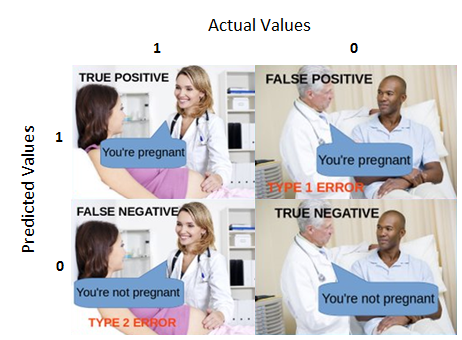

오차 행렬을 구하는 `confusion_matrix()` 메서드를 사용하여 `MyFakeClassifier` 분류기의 예측 성능 지표를 오차 행렬로 표현하겠습니다. 

In [6]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

무조건 negative로만 예측하도록 했기 때문에 TN과 FN만 카운트되어 있습니다.

이 네 값을 조합하면 분류기의 성능을 측정할 수 있는 지표인 **정확도(Accuracy)**, **정밀도(Precision)**, **재현율(Recall)**을 도출할 수 있습니다. 정확도를 구하는 공식은 아래와 같습니다.

$$\frac{예측 결과와 실제 값이 동일한 건수}{전체 데이터 수} = \frac{TN+TP}{TN+FP+FN+TP}$$

일반적으로 불균형한 레이블 클래스를 가진 이진 분류 모델에서는 많은 데이터 중에 중점으로 찾아야 할 매우 적은 수의 결괏값에 Positive(양성)를 설정하여 1 값을 부여하고, 그렇지 않은 경우는 Negative(음성)로 0 값을 부여합니다.

# **3. 정밀도와 재현율**

**정밀도**와 **재현율**은 Positive 데이터 세트의 예측 성능에 초점을 맞춘 평가 지표입니다. `MyFakeClassifier` 분류기는 Positive로 예측한 TP 값이 하나도 없으므로 정밀도와 재현율 값은 모두 0입니다. 아래는 정밀도와 재현율의 공식입니다.

$$정밀도 = \frac{TP}{FP+TP}$$

$$재현율 = \frac{TP}{FN+TP}$$

**정밀도**는 **양성 예측도**라고도 부릅니다. 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻합니다. FP+TP는 Positive로 예측한 모든 데이터 개수입니다. Positive 예측 성능을 더 정밀하게 측정하기 위한 평가 지표입니다. 

**재현율**은 **민감도(Sensitivity)**, **TPR(True Positive Rate)**라고도 부릅니다. 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻합니다. FN+FP는 실제 값이 Positive인 모든 데이터 개수입니다.

두 지표는 서로 상호보완적인 관계로서 둘 모두 수치가 높아야 좋습니다. 아울러 업무 특성에 따라 특정 지표가 더 중요할 수 있습니다. 기실 정밀도보다 재현율이 더 중요한 경우가 많습니다. 재현율이 더 중요한 경우는 Positive를 Negative로 판단하면 큰 문제를 초래하는 경우입니다. 암 여부를 판단하는 모델과 금융 사기를 적발하는 모델을 예로 들 수 있습니다. 반면 정밀도가 더 중요한 경우는 재현율과 반대로 Negative를 Positive로 판단하면 큰 문제를 초래하는 경우입니다. 스팸메일 여부를 판단하는 모델을 예로 들 수 있습니다. Negative인 일반 메일을 Positive인 스팸 메일로 분류하면 메일을 아예 수신하지 못할 수도 있습니다.

타이타닉 예제에서는 정확도만으로 성능을 평가했었습니다. 이번에는 오차 행렬, 정밀도, 재현율 모두를 구해서 성능을 평가하겠습니다. `precision_score()` 메서드는 정밀도 계산에 사용되고, `recall_score()` 메서드는 재현율 계산에 사용됩니다. 먼저 오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 `get_clf_eval()` 함수를 선언하겠습니다.

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {:.4f}, 정밀도: {:.4f}, 재현율: {:.4f}'.format(
        accuracy, precision, recall))

로지스틱 회귀를 기반으로 생존자를 예측하고 여러 지표를 한꺼번에 출력하겠습니다.

In [8]:
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('/content/gdrive/MyDrive/titanic/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(
    X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## **3.1. 정밀도/재현율 트레이드오프**

정밀도/재현율의 트레이드오프(trade-off)란 정밀도와 재현율은 상호 보완적인 지표이므로 결정 임곗값 하나를 강제로 높이면 다른 하나의 수치는 떨어지는 것을 의미합니다.

개별 데이터별로 예측 확률을 구하려면 `predict_proba()` 메서드를 호출합니다. 입력 파라미터는 `predict()` 메서드처럼 테스트 피처 데이터 세트를 입력합니다. 타이타닉 데이터 세트에 적용해보겠습니다.

In [9]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() 결과 Shape: {}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출:\n', pred_proba[:3])

pred_proba() 결과 Shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출:
 [[0.46191519 0.53808481]
 [0.878675   0.121325  ]
 [0.87716185 0.12283815]]


샘플 179개와 예측 클래스 값 유형 2개(이진 분류)이므로 `(179, 2)`로 출력됐습니다. 첫 번째 열은 0에 대한 확률, 두 번째 열은 1에 대한 확률입니다. 더 높은 확률을 예측값으로 삼습니다.

`Binarizer` 클래스를 호출하여 결정 임곗값을 `1.1`로 지정하고 임의의 배열을 지정해보겠습니다. `1.1`이 넘으면 1을 반환하고 작으면 0을 반환합니다.

In [10]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.2, 1.2]]

binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 1.]]


`binarizer` 인스턴스를 사용하여 `predict()` 메서드의 의사(pseudo) 코드를 작성해 보겠습니다. `pred_proba` 객체에 결정 임곗값을 0.5로 지정한 `binarizer` 인스턴스를 적용하여 최종 예측값을 구하겠습니다.

In [11]:
custom_threshold = 0.5
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


출력된 결괏값은 위에서 출력한 결괏값과 같습니다.

임곗값을 낮춰보겠습니다.

In [12]:
custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test, custom_predict)

오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361


재현율이 오르고 정밀도가 낮아졌습니다. 0.4부터 Positive로 예측하므로 임곗값을 낮출수록 True 값은 더 많아지는 것입니다. Positive로 예측하는 값이 많아지면 재현율 값은 높아집니다. 실제 Positive을 Negative로 예측하는 횟수가 상대적으로 줄어드는 것입니다.

임곗값을 0.4 ~ 0.6까지 0.05씩 증가시키면서 평가 지표를 확인하기 위해 새로운 함수를 선언하겠습니다.

In [13]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        print()

In [14]:
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361

임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033

임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869

임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541

임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377



`precision_recall_curve()` 메서드를 사용하여 타이타닉 예측 모델의 임곗값별 정밀도와 재현율을 구하겠습니다. 

In [15]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1인 예측 확률을 추출합니다.
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

# 실제 데이터 세트와 레이블 값이 1인 예측 확률을 인자로 입력합니다.
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

# 반환된 임곗값 배열의 행이 143건이므로 샘플 10개만 추출하되 임곗값을 15 step으로 추출합니다.
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 임곗값 10개:', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 정밀도:', np.round(precisions[thr_index], 3))
print('샘플 임곗값별 재현율:', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (143,)
샘플 추출을 위한 임곗값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 임곗값 10개: [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임곗값별 정밀도: [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임곗값별 재현율: [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


임곗값이 높아질수록 정밀도는 높아지고 재현율은 낮아집니다. 

곡선 그래프로 시각화해보겠습니다.

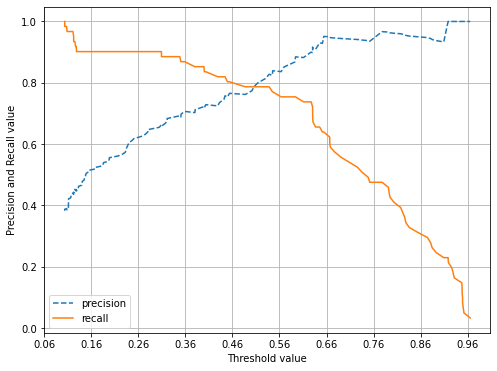

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

임곗값이 낮을수록 양성으로 예측하는 수가 많아서 재현율은 높고 정밀도는 낮습니다. 

## **3.2. 정밀도와 재현율의 맹점**

중요하지 않은 내용이므로 생략하겠습니다. 두 성능 지표 중 하나만 지나치게 높이는 방법은 옳지 않습니다. 상호 보완할 수 있는 수치여야 합니다.

### **3.2.1. 정밀도가 100%가 되는 방법**

생략합니다.

### **3.2.2. 재현율이 100%가 되는 방법**

생략합니다.

# **4. F1 스코어**

**F1 스코어**는 정밀도와 재현율을 결합한 성능 측정 지표입니다. 정밀도와 재현율이 어느 한 쪽으로 치우치지 않을 때 값이 높습니다. 아래는 F1 스코어의 공식입니다.

$$F1 = \frac{2}{\frac{1}{recall} + \frac{1}{precision}} = 2 * \frac{precision * recall}{precision + recall}$$

`f1_score()` 메서드를 사용하여 타이타닉 생존자 모델의 F1 스코어를 구해보겠습니다.

In [17]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {:.4f}'.format(f1))

F1 스코어: 0.7805


임곗값을 바꿔가면서 F1 스코어를 포함한 평가 지표를 구해보겠습니다. 먼저 위에서 생성한 `get_clf_eval()` 함수에 F1 스코어를 구하는 로직을 추가하겠습니다.

In [18]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {:.4f}, 정밀도: {:.4f}, 재현율: {:.4f}, F1: {:.4f}'.format(
        accuracy, precision, recall, f1))

In [19]:
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361, F1: 0.7727

임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, F1: 0.7840

임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1: 0.7805

임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, F1: 0.7931

임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, F1: 0.8036



# **5. ROC 곡선과 AUC**

**ROC 곡선(Receiver Operation Characteristic Curve, 수신자 판단 곡선)**과 이에 기반한 **AUC 스코어(Area Under Curve Score)**는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표입니다. ROC 곡선은 **FPR(False Positive Rate)**이 변할 때 **TPR(True Positive Rate, 재현율, 민감도)**이 변하는 정도를 나타냅니다. FPR을 x축, TPR을 y축에 둡니다. FPR에 대응하는 지표는 **TNR(True Negative Rate, Specificity, 특이성)**입니다. 

- TPR은 실젯값인 Positive가 정확하게 예측되어야 하는 수준입니다. 암을 암으로 판단하는 것을 예로 들 수 있습니다.

- TNR은 실젯값인 Negative가 정확하게 예측되어야 하는 수준입니다. 암이 없는 사람은 암이 없다고 판단하는 것을 예로 들 수 있습니다.

TNR과 FPR은 아래 공식으로 구할 수 있습니다.

$$TNR = \frac{TN}{FP + TN}$$

$$FPR = \frac{FP}{FP + TN} = 1 - TNR$$

ROC 곡선의 예입니다.

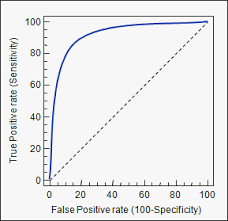

가운데 점선은 ROC 곡선의 최저값, 파란색 대각선은 무작위로 동전을 던져서 앞과 뒤를 맞추는 랜덤 수준의 이진 분류 ROC 직선입니다. AUC는 0.5입니다. ROC 곡선이 가운데 점선에 가까울수록 성능이 떨어지고 멀어질수록 성능이 좋아집니다.

ROC 곡선은 FPR을 0 ~ 1까지 바꾸면서 TPR의 변홧값을 구합니다.

- FPR을 바꾸려면 분류 결정 임곗값을 바꿉니다. FPR을 0으로 만들려면 임곗값을 1로 바꿉니다. 임곗값을 1로 바꾸면 Positive 예측 기준이 매우 높아지므로 임곗값보다 높은 확률을 가진 데이터를 Positive로 예측할 수 없게 됩니다.

- FPR을 1로 만들려면 TN을 0으로 바꿉니다. TN을 0으로 만들려면 임곗값을 0으로 바꿉니다. 임곗값을 0으로 바꾸면 Positive 예측 기준이 매우 낮아지므로 전부 Positive로 예측합니다.

`roc_curve()` 메서드를 사용하면 ROC 곡선을 구할 수 있습니다. 이 메서드를 사용하여 타이타닉 생존자 예측 모델의 FPR, TPR, 임곗값을 구해보겠습니다.

In [20]:
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
thr_index = np.arange(1, thresholds.shape[0], 5)

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값:', np.round(thresholds[thr_index], 2))

print('샘플 임곗값별 FPR:', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR:', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임곗값: [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임곗값별 FPR: [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임곗값별 TPR: [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


ROC 곡선을 그려보겠습니다.

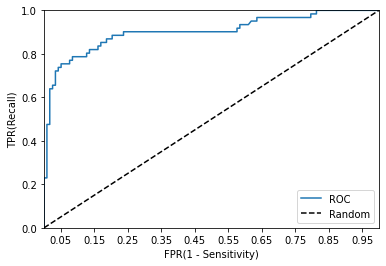

In [21]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 그립니다.
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선을 그립니다.
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    # X축 scale을 0.1 단위로 변경합니다.
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR(1 - Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()

roc_curve_plot(y_test, pred_proba[:, 1])

ROC 곡선은 FPR과 TPR의 변홧값을 보는 데 이용하고, AUC 값은 분류의 성능 지표로 이용합니다. AUC 값은 ROC 곡선 밑의 면적을 구한 것입니다. 1에 가까울수록 좋은 수치입니다. AUC 값이 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건입니다. 가운데 직선에서 멀어지고 왼쪽 상단 모서리 쪽으로 가파르게 곡선이 이동할수록 직사각형에 가까운 곡선이 되어 면적이 1에 가까워지는 좋은 ROC AUC 성능 수치를 얻게 됩니다. 가운데 직선은 랜덤 수준의 이진 분류 AUC 값이며 0.5입니다. 보통 분류는 0.5 이상의 AUC 값을 가집니다.

`roc_auc_score` 메서드로 타이타닉 생존자 예측 로지스틱 회귀 모델의 ROC AUC 값을 구해보겠습니다.

In [22]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {:.4f}'.format(roc_score))

ROC AUC 값: 0.9024


위에서 선언했던 `get_clf_eval()` 함수에 ROC AUC 값을 측정하는 로직을 추가하겠습니다. ROC AUC는 예측 확률값을 기반으로 계산되므로 이를 인자로 받을 수 있도록 `pred_proba=None`를 함수의 인자로 추가하겠습니다. 

In [23]:
def get_clf_eval(y_test, pred, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {:.4f}, 정밀도: {:.4f}, 재현율: {:.4f}, F1: {:.4f},\
    AUC: {:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [24]:
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)
        print()

# **6. 파마 인디언 당뇨병 예측**

[파마 인디언 당뇨병 데이트 세트](https://www.kaggle.com/uciml/pima-indians-diabetes-database)로 당뇨병 여부를 판단하는 머신러닝 예측 모델을 수립하고 여러 평가 지표를 적용해보겠습니다.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('/content/gdrive/MyDrive/Pima Indian Diabetes/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head()

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


negative(0)의 비율은 약 65%, Positive(1)의 비율은 약 35%입니다.

피처 타입을 확인하겠습니다.

In [26]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


피처 타입은 모두 숫자형입니다. 피처 인코딩은 불필요합니다.

로지스틱 회귀를 이용하여 예측 모델을 생성해 보겠습니다. 위에서 선언한 세 함수인 `get_clf_eval()`, `get_eval_by_threshold()`, `precision_recall_curve_plot()`도 사용하겠습니다.

In [27]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=156, stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741, F1: 0.6392,    AUC: 0.7919


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


데이터의 65%가 Negative이므로 정확도보다는 재현율에 중점을 두겠습니다. ROC 곡선을 그려보겠습니다.

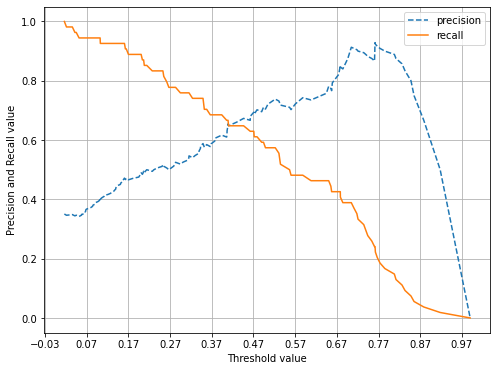

In [28]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

임곗값을 0.40 정도로 낮추면 정밀도와 재현율의 균형을 맞출 수 있습니다. 다만 두 지표 모두 0.7도 되지 않습니다. 문제를 찾아야 합니다.

피처를 다시 살펴보겠습니다.

In [29]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


주목해야 할 수치는 최솟값입니다. 'Glucose' 피처는 포도당 수치를 의미합니다. 포도당 수치가 0일 수는 없습니다. 그 외 몇몇 피처도 0일 수는 없습니다. 일단 'Glucose' 피처를 히스토그램으로 살펴보겠습니다.

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

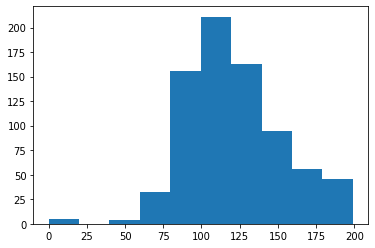

In [30]:
plt.hist(diabetes_data['Glucose'], bins=10)

0일 수 없는 피처에 대하여 0이 얼마큼 존재하는지 비율로 확인해 보겠습니다. 

In [31]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 개수를 구합니다.
total_count = diabetes_data['Glucose'].count()

for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{} 피처의 0 값 개수는 {}, 비율은 {:.2f} %'.format(feature, zero_count,
                                              100 * zero_count/total_count))

Glucose 피처의 0 값 개수는 5, 비율은 0.65 %
BloodPressure 피처의 0 값 개수는 35, 비율은 4.56 %
SkinThickness 피처의 0 값 개수는 227, 비율은 29.56 %
Insulin 피처의 0 값 개수는 374, 비율은 48.70 %
BMI 피처의 0 값 개수는 11, 비율은 1.43 %


'SkinThickness'와 'Insulin'의 0의 비율이 높습니다. 전체 데이터가 많지 않으므로 0인 데이터를 삭제하는 대신 평균값으로 대체하겠습니다.

In [32]:
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

평균값으로 대체한 데이터 세트에 대하여 피처 스케일링을 적용하여 변환하겠습니다. 로지스틱 회귀는 숫자 데이터에 스케일링을 적용하고 활용하는 편이 좋습니다. 

In [33]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=156, stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804,    AUC: 0.8433


이전 수치는 정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741, F1: 0.6392, AUC: 0.7919였습니다. 전반적으로 개선되었지만 재현율은 아직 많이 부족합니다. 하이퍼 파라미터 튜닝은 이번 챕터에서는 다루지 않으므로 임곗값만 바꿔가면서 재현율을 개선시켜 보겠습니다.

In [34]:
thresholds = [0.30, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값: 0.3
오차 행렬
[[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963, F1: 0.6615,    AUC: 0.8433

임곗값: 0.33
오차 행렬
[[72 28]
 [12 42]]
정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778, F1: 0.6774,    AUC: 0.8433

임곗값: 0.36
오차 행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222, F1: 0.6667,    AUC: 0.8433

임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037, F1: 0.6667,    AUC: 0.8433

임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667, F1: 0.6792,    AUC: 0.8433

임곗값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667, F1: 0.6857,    AUC: 0.8433

임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931,    AUC: 0.8433

임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1: 0.6804,    AUC: 0.8433



재현율이 가장 높은 임곗값은 0.3입니다. 다만 다른 지표들이 모두 낮으므로 옳지 않습니다. 전체적으로 성능을 유지하면서 재현율을 약간 향상시키는 임곗값을 선택해야 합니다. 0.48이 가장 적절해 보입니다.

`predict()` 메서드는 임곗값을 임의로 바꿀 수 없습니다. 따로 구현해야 합니다.

In [36]:
binarizer = Binarizer(threshold=0.48)
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_048, pred_proba[:, 1])

오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931,    AUC: 0.8433


# **7. 정리**

생략합니다.